## 1.Processing data

In [187]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

#read data.csv file and 
column_headings = ('index','id','text','channel','date','vid_id','vid_title','vid_date','country')
df = pd.read_csv('data.csv',names = column_headings)
df.head()

,index,id,text,channel,date,vid_id,vid_title,vid_date,country
0,index,id,text,channel,date,vid_id,vid_title,vid_date,country
1,0,UgwC8_NE34ufIJL4fxx4AaABAg,AI got the subtitles in the wrong place,UCIA3OOgBHW2Pf7o9FLon3Uw,2023-03-22T13:56:11Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,NaN
2,1,Ugxr-6SYgm6KH1r_lTB4AaABAg,I think WE ARE the threat to Conscious AI,UCjbaUaJiOUOrtYYkr5YPHjA,2023-03-16T04:18:19Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,NaN
3,2,UgxfGeSreZRS3dbUtbF4AaABAg,Tell this to the people again now,UCsqibAtsx8Ydjx6oRDSsD3w,2023-03-15T14:33:45Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,NaN
4,3,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU


In [188]:
# drop the first index column
df1 = df.drop(columns = 'index')
# drop first row
df2 = df1.drop(index=0)
#drop comments without geographic location
df3 = df2.dropna(subset=['country'])
# reset index in order
df4 = df3.reset_index(drop=True)
df4.head()


,id,text,channel,date,vid_id,vid_title,vid_date,country
0,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU
1,Ugx5Nzd6Z3wNgEP9b394AaABAg,Her presentation skills are similar to the hum...,UCQphwD5T37LFXQgyfklvPMA,2023-02-08T06:33:25Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,CA
2,UgyJ32d9gtRFpBclgGt4AaABAg,"""It doesn't know what a human is""\nWhich is am...",UCZOavABdxr61dMMxkRZXUdA,2023-01-25T03:03:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US
3,UgyC7vlEJR2djI2REbF4AaABAg,"""Based on the data we have, hiring women is a ...",UCPZYOveDXQQBe16JnOH0ZRQ,2023-01-24T00:14:58Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US
4,UgyXxc37Xf9sLlNZ5Sp4AaABAg,Janelle is simplifying a complex subject matte...,UCS9_kMzgw9WfLpF4--H3TmQ,2023-01-14T14:08:28Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US


Text(0, 0.5, 'Number of comments')

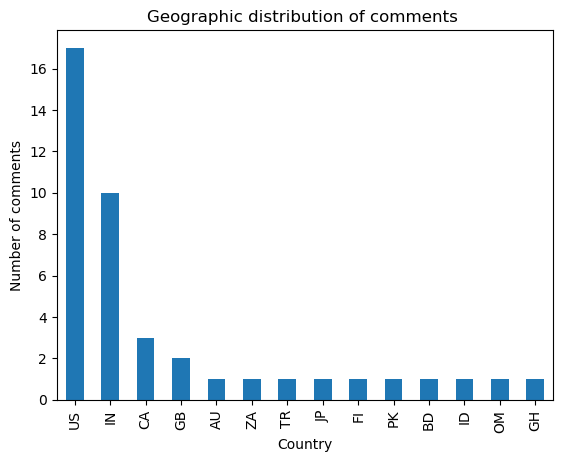

In [189]:
df4.country.value_counts().plot(kind = 'bar')
plt.title('Geographic distribution of comments ')
plt.xlabel('Country')
plt.ylabel('Number of comments')

AU: Australia
BD: Bangladesh
CA: Canada
FI: Finland
GB: United Kingdom (Great Britain)
GH: Ghana
ID: Indonesia
IN: India
JP: Japan
OM: Oman
PK: Pakistan
TR: Turkey
US: United States of America
ZA: South Africa


In [190]:
np.unique(df4.country)


array(['AU', 'BD', 'CA', 'FI', 'GB', 'GH', 'ID', 'IN', 'JP', 'OM', 'PK',
       'TR', 'US', 'ZA'], dtype=object)

## cleaning the text


In [191]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('omw-1.4')
nltk.download('stopwords')

#seperate the words
stop_words = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer('english')

TEXT = []
for k in range(int(len(df4))):
    text = df4.text[k]
    text = text.lower()
    
    words = word_tokenize(text)
    #print(words)

    wordlist = []
    for word in words:
        if word not in stop_words:
            wordlist.append(word)
    #print(wordlist)

    wordlist = [word for word in wordlist if not word.isdigit()]
    #print(wordlist)

    specialcharacters = ['!','@','#','$','.','?','&','*','(',')','%','£',':',',','"']
    wordlist = [word for word in wordlist if word not in specialcharacters]
    
    #wordlist = [stemmer.stem(word) for word in wordlist ]

    text = ' '.join(wordlist)
    TEXT.append(text)
print(TEXT)



['star trek emergence season episode may good example ai probably harmless used like encyclopedia put charge satellite system rocket would', 'presentation skills similar humanoid robots ai created', "`` n't know human '' amazing since chatgpt describe human beautifully know human looks like feels like sounds like ... feelings get around one biggest things think missing quest towards agi multi-sensory inputs humans excel large part take data _types_ data", "`` based data hiring women bad decision '' wrong", "janelle simplifying complex subject matter illustrate much control must administer pre-defined parameters must set ensure a.i produce useful results extremely true element a.i. must keep mind working a.i times address possibilities yet imagine order focus results a.i something significantly useful yet surely scenarios exceptions every a.i situation yet imagine therefore able cover aspects a.i application would produce useless results thus definitively state a.i turn us yes correct c

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\YHU\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
df4.insert(2,'CleanedText',TEXT)
df4.head()


,id,text,CleanedText,channel,date,vid_id,vid_title,vid_date,country
0,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",star trek emergence season episode may good ex...,UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU
1,Ugx5Nzd6Z3wNgEP9b394AaABAg,Her presentation skills are similar to the hum...,presentation skills similar humanoid robots ai...,UCQphwD5T37LFXQgyfklvPMA,2023-02-08T06:33:25Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,CA
2,UgyJ32d9gtRFpBclgGt4AaABAg,"""It doesn't know what a human is""\nWhich is am...",`` n't know human '' amazing since chatgpt des...,UCZOavABdxr61dMMxkRZXUdA,2023-01-25T03:03:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US
3,UgyC7vlEJR2djI2REbF4AaABAg,"""Based on the data we have, hiring women is a ...",`` based data hiring women bad decision '' wrong,UCPZYOveDXQQBe16JnOH0ZRQ,2023-01-24T00:14:58Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US
4,UgyXxc37Xf9sLlNZ5Sp4AaABAg,Janelle is simplifying a complex subject matte...,janelle simplifying complex subject matter ill...,UCS9_kMzgw9WfLpF4--H3TmQ,2023-01-14T14:08:28Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US


## 2. Sentiment Analysis


#  Textblob


In [193]:
# use textblob reference: https://textblob.readthedocs.io/en/dev/
from textblob import TextBlob

df4.text.head()

0    Star Trek Emergence Season 7, episode 23 may b...
1    Her presentation skills are similar to the hum...
2    "It doesn't know what a human is"\nWhich is am...
3    "Based on the data we have, hiring women is a ...
4    Janelle is simplifying a complex subject matte...
Name: text, dtype: object

In [194]:
pol = []
sub = []

for k in range(int(len(df4))):
    text = str(df4.CleanedText[k])
    blob = TextBlob(text)
    pol.append(blob.sentiment.polarity)
    sub.append(blob.sentiment.subjectivity)

print(pol)
print(sub)

[0.7, 0.0, 0.20918367346938777, -0.5999999999999999, 0.06312576312576312, 0.0, 0.07500000000000001, 0.0, 0.005357142857142854, -0.8, 0.5, -0.30000000000000004, 0.0625, 0.5, -0.04999999999999999, 0.0, 0.5, 0.4, 0.0, 0.0, 0.26666666666666666, 0.0, 0.6000000000000001, -0.06000000000000001, 0.0, 0.0, 0.0, 0.0, -0.025000000000000022, 0.3666666666666667, 0.29166666666666663, 0.0, 0.0, 0.6, 0.35, 0.0, 0.0, 0.3, 0.6, 0.2833333333333333, -0.6666666666666666, 0.15]
[0.6000000000000001, 0.4, 0.3826530612244898, 0.7833333333333333, 0.46213878713878714, 0.0, 0.5267857142857143, 0.0, 0.6349489795918367, 0.9, 0.8888888888888888, 0.6, 0.5, 0.625, 0.75, 0.6944444444444444, 0.5, 0.8, 0.0, 0.0, 0.65, 0.125, 0.9, 0.44000000000000006, 0.0, 0.0, 0.0, 0.0, 0.625, 0.6749999999999999, 0.55625, 0.0, 0.0, 0.8, 0.36250000000000004, 0.0, 0.0, 0.0, 0.6, 0.5, 1.0, 0.6499999999999999]


In [195]:
df4.insert(df4.shape[1],'Score_TextBlob',pol)
df4.head()
    

,id,text,CleanedText,channel,date,vid_id,vid_title,vid_date,country,Score_TextBlob
0,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",star trek emergence season episode may good ex...,UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU,0.700000
1,Ugx5Nzd6Z3wNgEP9b394AaABAg,Her presentation skills are similar to the hum...,presentation skills similar humanoid robots ai...,UCQphwD5T37LFXQgyfklvPMA,2023-02-08T06:33:25Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,CA,0.000000
2,UgyJ32d9gtRFpBclgGt4AaABAg,"""It doesn't know what a human is""\nWhich is am...",`` n't know human '' amazing since chatgpt des...,UCZOavABdxr61dMMxkRZXUdA,2023-01-25T03:03:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.209184
3,UgyC7vlEJR2djI2REbF4AaABAg,"""Based on the data we have, hiring women is a ...",`` based data hiring women bad decision '' wrong,UCPZYOveDXQQBe16JnOH0ZRQ,2023-01-24T00:14:58Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,-0.600000
4,UgyXxc37Xf9sLlNZ5Sp4AaABAg,Janelle is simplifying a complex subject matte...,janelle simplifying complex subject matter ill...,UCS9_kMzgw9WfLpF4--H3TmQ,2023-01-14T14:08:28Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.063126


In [196]:
sentiment = []
for i in pol:
    if i < 0:
        sentiment.append('Negative')
    elif i == 0:
        sentiment.append('Neutral')
    else:
        sentiment.append('Positive')
print(sentiment)


['Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive']


In [197]:
df4.insert(df4.shape[1],'Sentiment_TextBlob',sentiment)
df4.head()

,id,text,CleanedText,channel,date,vid_id,vid_title,vid_date,country,Score_TextBlob,Sentiment_TextBlob
0,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",star trek emergence season episode may good ex...,UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU,0.700000,Positive
1,Ugx5Nzd6Z3wNgEP9b394AaABAg,Her presentation skills are similar to the hum...,presentation skills similar humanoid robots ai...,UCQphwD5T37LFXQgyfklvPMA,2023-02-08T06:33:25Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,CA,0.000000,Neutral
2,UgyJ32d9gtRFpBclgGt4AaABAg,"""It doesn't know what a human is""\nWhich is am...",`` n't know human '' amazing since chatgpt des...,UCZOavABdxr61dMMxkRZXUdA,2023-01-25T03:03:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.209184,Positive
3,UgyC7vlEJR2djI2REbF4AaABAg,"""Based on the data we have, hiring women is a ...",`` based data hiring women bad decision '' wrong,UCPZYOveDXQQBe16JnOH0ZRQ,2023-01-24T00:14:58Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,-0.600000,Negative
4,UgyXxc37Xf9sLlNZ5Sp4AaABAg,Janelle is simplifying a complex subject matte...,janelle simplifying complex subject matter ill...,UCS9_kMzgw9WfLpF4--H3TmQ,2023-01-14T14:08:28Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.063126,Positive


# Vader


In [198]:
# pattern vader affin

# use vader to analyse sentiment
# install vadersentiment using command pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

score_vader = []
sentiment_vader=[]
for text in df4.CleanedText:
    scores= SentimentIntensityAnalyzer().polarity_scores(text)
    score_vader.append(scores['compound'])
    if scores['compound']< 0:
        sentiment_vader.append('Negative')
    elif scores['compound']== 0:
        sentiment_vader.append('Neutral')
    else:
        sentiment_vader.append('Positive')
   
print(score_vader)
print(sentiment_vader)



[0.7506, 0.25, 0.9413, -0.765, 0.8254, 0.0, 0.555, 0.2732, 0.765, -0.5719, 0.7724, 0.4588, -0.7425, 0.0, 0.8442, 0.3182, 0.0, 0.5106, 0.0, 0.0, 0.7506, 0.0, 0.6808, 0.34, 0.0, 0.0, 0.0, 0.0, -0.4019, 0.2306, -0.7039, 0.2732, 0.5423, 0.4215, 0.5106, 0.3612, 0.5423, 0.4939, 0.765, 0.9153, 0.4215, 0.5994]
['Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive']


In [199]:
df4.insert(df4.shape[1],'Score_Vader',score_vader)
df4.insert(df4.shape[1],'Sentiment_Vader',sentiment_vader)
df4.head()

,id,text,CleanedText,channel,date,vid_id,vid_title,vid_date,country,Score_TextBlob,Sentiment_TextBlob,Score_Vader,Sentiment_Vader
0,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",star trek emergence season episode may good ex...,UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU,0.700000,Positive,0.7506,Positive
1,Ugx5Nzd6Z3wNgEP9b394AaABAg,Her presentation skills are similar to the hum...,presentation skills similar humanoid robots ai...,UCQphwD5T37LFXQgyfklvPMA,2023-02-08T06:33:25Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,CA,0.000000,Neutral,0.2500,Positive
2,UgyJ32d9gtRFpBclgGt4AaABAg,"""It doesn't know what a human is""\nWhich is am...",`` n't know human '' amazing since chatgpt des...,UCZOavABdxr61dMMxkRZXUdA,2023-01-25T03:03:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.209184,Positive,0.9413,Positive
3,UgyC7vlEJR2djI2REbF4AaABAg,"""Based on the data we have, hiring women is a ...",`` based data hiring women bad decision '' wrong,UCPZYOveDXQQBe16JnOH0ZRQ,2023-01-24T00:14:58Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,-0.600000,Negative,-0.7650,Negative
4,UgyXxc37Xf9sLlNZ5Sp4AaABAg,Janelle is simplifying a complex subject matte...,janelle simplifying complex subject matter ill...,UCS9_kMzgw9WfLpF4--H3TmQ,2023-01-14T14:08:28Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.063126,Positive,0.8254,Positive


## Afinn


In [200]:
# use AFINN to have sentiment analysis
# pip install Afinn

from afinn import Afinn

score_afn = []
sentiment_afn=[]
for text in df4.CleanedText:
    score= Afinn().score(text)
    score_afn.append(score)
    if score<0:
        sentiment_afn.append('Negative')
    elif score == 0:
        sentiment_afn.append('Neutral')
    else:
        sentiment_afn.append('Positive')
   
print(score_vader)
print(sentiment_vader)

[0.7506, 0.25, 0.9413, -0.765, 0.8254, 0.0, 0.555, 0.2732, 0.765, -0.5719, 0.7724, 0.4588, -0.7425, 0.0, 0.8442, 0.3182, 0.0, 0.5106, 0.0, 0.0, 0.7506, 0.0, 0.6808, 0.34, 0.0, 0.0, 0.0, 0.0, -0.4019, 0.2306, -0.7039, 0.2732, 0.5423, 0.4215, 0.5106, 0.3612, 0.5423, 0.4939, 0.765, 0.9153, 0.4215, 0.5994]
['Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive']


In [201]:
df4.insert(df4.shape[1],'Score_Afinn',score_afn)
df4.insert(df4.shape[1],'Sentiment_Afinn',sentiment_afn)
df4.head()

,id,text,CleanedText,channel,date,vid_id,vid_title,vid_date,country,Score_TextBlob,Sentiment_TextBlob,Score_Vader,Sentiment_Vader,Score_Afinn,Sentiment_Afinn
0,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",star trek emergence season episode may good ex...,UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU,0.700000,Positive,0.7506,Positive,5.0,Positive
1,Ugx5Nzd6Z3wNgEP9b394AaABAg,Her presentation skills are similar to the hum...,presentation skills similar humanoid robots ai...,UCQphwD5T37LFXQgyfklvPMA,2023-02-08T06:33:25Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,CA,0.000000,Neutral,0.2500,Positive,0.0,Neutral
2,UgyJ32d9gtRFpBclgGt4AaABAg,"""It doesn't know what a human is""\nWhich is am...",`` n't know human '' amazing since chatgpt des...,UCZOavABdxr61dMMxkRZXUdA,2023-01-25T03:03:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.209184,Positive,0.9413,Positive,11.0,Positive
3,UgyC7vlEJR2djI2REbF4AaABAg,"""Based on the data we have, hiring women is a ...",`` based data hiring women bad decision '' wrong,UCPZYOveDXQQBe16JnOH0ZRQ,2023-01-24T00:14:58Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,-0.600000,Negative,-0.7650,Negative,-5.0,Negative
4,UgyXxc37Xf9sLlNZ5Sp4AaABAg,Janelle is simplifying a complex subject matte...,janelle simplifying complex subject matter ill...,UCS9_kMzgw9WfLpF4--H3TmQ,2023-01-14T14:08:28Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.063126,Positive,0.8254,Positive,2.0,Positive


## Pattern

In [202]:
# use NLTK Downloader to obtain the resource
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\YHU\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [203]:
from pattern.en import sentiment

score_pattern = []
sentiment_pattern = []
for text in df4.CleanedText:
    score = sentiment(text)[0]
    score_pattern.append(score)
    if score < 0:
        sentiment_pattern.append('Negative')
    elif score == 0:
        sentiment_pattern.append('Neutral')
    else:
        sentiment_pattern.append('Positive')
        
    
print(score_pattern)
print(sentiment_pattern)

[0.7, 0.0, 0.20918367346938777, -0.5999999999999999, 0.06504884004884004, 0.0, 0.07500000000000001, 0.0, 0.005357142857142854, -0.8, 0.5, -0.30000000000000004, 0.0625, 0.5, -0.04999999999999999, 0.0, 0.5, 0.4, 0.0, 0.0, 0.26666666666666666, 0.0, 0.6000000000000001, -0.06000000000000001, 0.5, 0.0, 0.0, 0.0, -0.025000000000000022, 0.06666666666666667, 0.18333333333333332, -1.0, 0.0, 0.6, 0.35, 0.0, 0.0, -0.225, 0.6, 0.2833333333333333, -0.6666666666666666, 0.15]
['Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive']


In [204]:
df4.insert(df4.shape[1],'Score_Pattern',score_pattern)
df4.insert(df4.shape[1],'Sentiment_Pattern',sentiment_pattern)
df4

,id,text,CleanedText,channel,date,vid_id,vid_title,vid_date,country,Score_TextBlob,Sentiment_TextBlob,Score_Vader,Sentiment_Vader,Score_Afinn,Sentiment_Afinn,Score_Pattern,Sentiment_Pattern
0,UgyMYmRpiaALxlXalop4AaABAg,"Star Trek Emergence Season 7, episode 23 may b...",star trek emergence season episode may good ex...,UCKqxhr_SUHw59C5ryXDyESw,2023-03-15T05:25:15Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,AU,0.700000,Positive,0.7506,Positive,5.0,Positive,0.700000,Positive
1,Ugx5Nzd6Z3wNgEP9b394AaABAg,Her presentation skills are similar to the hum...,presentation skills similar humanoid robots ai...,UCQphwD5T37LFXQgyfklvPMA,2023-02-08T06:33:25Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,CA,0.000000,Neutral,0.2500,Positive,0.0,Neutral,0.000000,Neutral
2,UgyJ32d9gtRFpBclgGt4AaABAg,"""It doesn't know what a human is""\nWhich is am...",`` n't know human '' amazing since chatgpt des...,UCZOavABdxr61dMMxkRZXUdA,2023-01-25T03:03:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.209184,Positive,0.9413,Positive,11.0,Positive,0.209184,Positive
3,UgyC7vlEJR2djI2REbF4AaABAg,"""Based on the data we have, hiring women is a ...",`` based data hiring women bad decision '' wrong,UCPZYOveDXQQBe16JnOH0ZRQ,2023-01-24T00:14:58Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,-0.600000,Negative,-0.7650,Negative,-5.0,Negative,-0.600000,Negative
4,UgyXxc37Xf9sLlNZ5Sp4AaABAg,Janelle is simplifying a complex subject matte...,janelle simplifying complex subject matter ill...,UCS9_kMzgw9WfLpF4--H3TmQ,2023-01-14T14:08:28Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.063126,Positive,0.8254,Positive,2.0,Positive,0.065049,Positive
5,UgyIYQWJIr9vzBAHRL14AaABAg,Who is watching this after finding out about C...,watching finding chatgpt,UCKhxxL36Nphe6vI1w200d9A,2023-01-07T10:49:38Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,ZA,0.000000,Neutral,0.0000,Neutral,0.0,Neutral,0.000000,Neutral
6,UgzDeJktFpajscztWHV4AaABAg,*Simple and great demonstration of how A.I can...,simple great demonstration a.i go wrong a.i no...,UCboHPvUe8sOR0pytqqZiAGQ,2023-01-03T22:58:55Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.075000,Positive,0.5550,Positive,0.0,Neutral,0.075000,Positive
7,UgxnVfo1jFrrv_qXvSt4AaABAg,This didn’t age well,’ age well,UCAolkUriFQthlKmI0bDUOgA,2022-12-18T03:40:47Z,OhCzX0iLnOc,The danger of AI is weirder than you think | J...,2019-11-13T23:02:20Z,US,0.000000,Neutral,0.2732,Positive,0.0,Neutral,0.000000,Neutral
8,Ugx7Ro61bIcyWNHT6c14AaABAg,"I mean, don't cross illegally. Seems pretty si...",mean n't cross illegally seems pretty simple e...,UCeua0HMGXwC5jcDhRTDUplg,2023-03-23T17:16:28Z,s0dMTAQM4cw,Artificial intelligence and algorithms: pros a...,2019-09-26T18:00:05Z,US,0.005357,Positive,0.7650,Positive,0.0,Neutral,0.005357,Positive
9,UgwHCJhQUjIMy1exV3l4AaABAg,36:08 exactly why I hate driving.,36:08 exactly hate driving,UCeua0HMGXwC5jcDhRTDUplg,2023-03-23T17:01:17Z,s0dMTAQM4cw,Artificial intelligence and algorithms: pros a...,2019-09-26T18:00:05Z,US,-0.800000,Negative,-0.5719,Negative,-3.0,Negative,-0.800000,Negative
